In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [44]:
"""
    改进前面自己手动实现的神经网络结构
"""
class Matmul:
    def __init__(self):
        self.mem = {}
        
    def forward(self, x, W):
        # print(x.shape, W.shape)
        h = np.matmul(x, W)
        self.mem={'x': x, 'W':W}
        return h
    
    def backward(self, grad_y):
        '''
        x: shape(N, d)
        w: shape(d, d')
        grad_y: shape(N, d')
        '''

        """
            H = x * W
            H 对 x 导: W^t
            H 对 W 导: x^t
        """
        x = self.mem['x']
        W = self.mem['W']
        
        ####################
        '''计算矩阵乘法的对应的梯度'''
        ####################
        # 注意要用矩阵乘法 matmul, 直接 * 和 multiply 是逐元素相乘
        grad_x = np.matmul(grad_y, W.T)
        grad_W = np.matmul(x.T, grad_y)
        return grad_x, grad_W


class Relu:
    def __init__(self):
        self.mem = {}
        
    def forward(self, x):
        self.mem['x']=x
        return np.where(x > 0, x, np.zeros_like(x))
    
    def backward(self, grad_y):
        '''
        grad_y: same shape as x
        '''
        ####################
        '''计算relu 激活函数对应的梯度'''
        ####################
        x = self.mem['x']
        grad_x = np.where(x > 0, grad_y, np.zeros_like(x))
        return grad_x

In [ ]:
class myModel:
    # 线性 + 激活函数 + 线性 的模型
    def __init__(self, hidden_size):
        
        self.W1 = np.random.normal(size=[1 + 1, hidden_size])
        self.W2 = np.random.normal(size=[hidden_size, 1])
        
        self.mul_h1 = Matmul()
        self.mul_h2 = Matmul()
        self.relu = Relu()
        
        
    def forward(self, x):
        x = x.reshape(-1, 1)
        bias = np.ones(shape=[x.shape[0], 1])
        x = np.concatenate([x, bias], axis=1)
        
        self.h1 = self.mul_h1.forward(x, self.W1)
        self.h1_relu = self.relu.forward(self.h1)
        self.h2 = self.mul_h2.forward(self.h1_relu, self.W2)
        return self.h2 
            
    def backward(self, grad_y):
        self.h2_grad, self.W2_grad = self.mul_h2.backward(grad_y)
        self.h1_relu_grad = self.relu.backward(self.h2_grad)
        self.h1_grad, self.W1_grad = self.mul_h1.backward(self.h1_relu_grad)
        


In [ ]:
def compute_loss(y_pred, y_true):
    # 均方误差
    return np.mean((y_true - y_pred)**2)

def train_one_step(model, x, y, lr=0.00001):
    # 训练1次
    y_pred = model.forward(x)
    loss = compute_loss(y_pred, y)
    grad_y = 2 * (y_pred - y) / y.shape[0]
    model.backward(grad_y)
    model.W1 -= lr * model.W1_grad
    model.W2 -= lr * model.W2_grad
    return loss

def test(model, x, y):
    # 测试
    model.forward(x)
    loss = compute_loss(model.h2, y)
    return loss

In [ ]:
def function(x):
    # 定义的任意函数
    return np.arctan(x) + np.log(x**2 + 1) + np.exp(x) - 8 * x**2 + np.sin(x)

Epoch 0: Train Loss 62619.5402, Test Loss 7148.5870
Epoch 10: Train Loss 1160.1834, Test Loss 1210.8021
Epoch 20: Train Loss 711.8816, Test Loss 721.7745
Epoch 30: Train Loss 463.1294, Test Loss 453.2806
Epoch 40: Train Loss 320.3786, Test Loss 301.5523
Epoch 50: Train Loss 234.9029, Test Loss 212.6248
Epoch 60: Train Loss 181.1599, Test Loss 158.1385
Epoch 70: Train Loss 145.5845, Test Loss 123.1315
Epoch 80: Train Loss 120.8366, Test Loss 99.5359
Epoch 90: Train Loss 102.8483, Test Loss 82.8977
Epoch 100: Train Loss 89.2943, Test Loss 70.7193
Epoch 110: Train Loss 78.7873, Test Loss 61.5270
Epoch 120: Train Loss 70.4659, Test Loss 54.4137
Epoch 130: Train Loss 63.7646, Test Loss 48.8076
Epoch 140: Train Loss 58.2976, Test Loss 44.3259
Epoch 150: Train Loss 53.7903, Test Loss 40.7015
Epoch 160: Train Loss 50.0392, Test Loss 37.7408
Epoch 170: Train Loss 46.8902, Test Loss 35.2988
Epoch 180: Train Loss 44.2243, Test Loss 33.2666
Epoch 190: Train Loss 41.9481, Test Loss 31.5601
Epoch 20

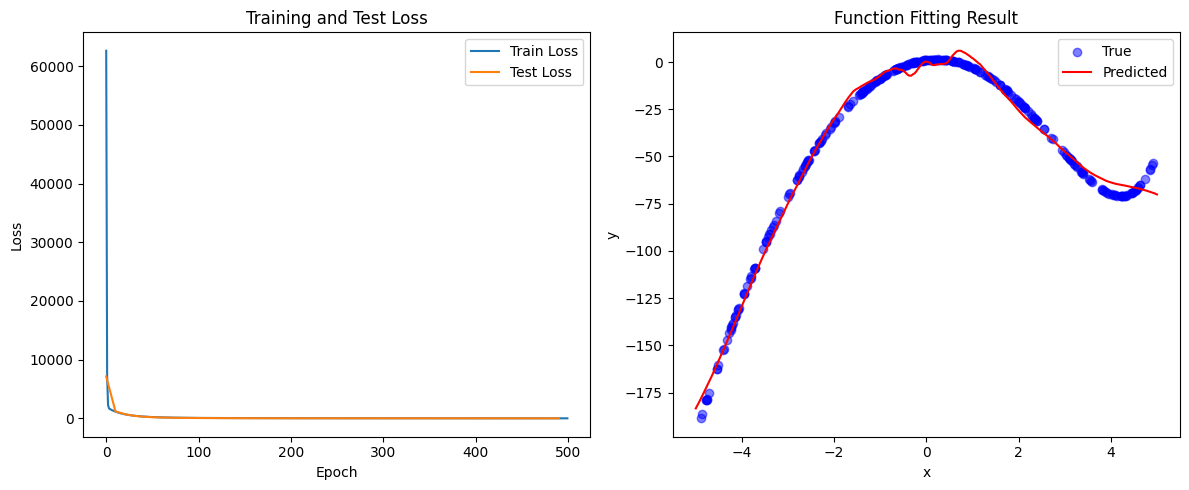

In [ ]:
x_train = np.linspace(-5, 5, 1000).reshape(-1, 1)
y_train = function(x_train)
x_test = np.random.uniform(-5, 5, 300).reshape(-1, 1)
y_test = function(x_test)

# 训练的循环  最终决定隐藏层设置为 8192个 神经元 越多越好
model = myModel(hidden_size=8192)
epochs = 500
train_losses = []
test_losses = []

for epoch in range(epochs):
    loss = train_one_step(model, x_train, y_train)
    train_losses.append(loss)
    
    if epoch % 10 == 0:
        test_loss = test(model, x_test, y_test)
        test_losses.append(test_loss)
        print(f'Epoch {epoch}: Train Loss {loss:.4f}, Test Loss {test_loss:.4f}')

# 最终测试
final_test_loss = test(model, x_test, y_test)
print(f'Final Test Loss: {final_test_loss:.4f}')

# 可视化 损失曲线 拟合结果
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(range(0, epochs, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
x_plot = np.linspace(-5, 5, 500).reshape(-1, 1)
y_plot = function(x_plot)
y_pred = model.forward(x_plot)

plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='True')
plt.plot(x_plot, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function Fitting Result')

plt.tight_layout()
plt.show()

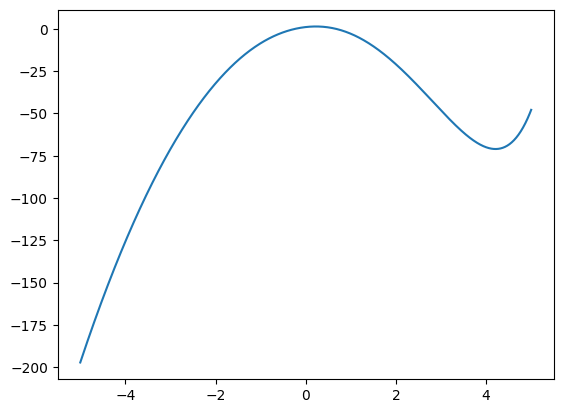

In [58]:
plt.plot(x_train, y_train)
plt.show()